In [75]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
# import shapely
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import os.path
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 12]

# Government of Ontario COVID data 
# Base URL of the public facing website
BASE_URL = "https://data.ontario.ca/dataset"
# Names of datasets, which we can use to fetch CSVs
DATASETS = [
    "Status of COVID-19 cases in Ontario", "Confirmed positive cases of COVID-19 in Ontario"
]

# Local folder to save case data
FOLDER_TEST_DATA = "data"

In [2]:
GOVERNMENT_INTERVENTIONS = [
    {
        "date": "2020-03-17", 
        "action": "State of emergency"
    }, 
    #    {
    #    "date": "2020-03-20", 
    #    "action": "US border closed"
    #}, 
        {
        "date": "2020-03-24", 
        "action": "Non-essential\nbusinesses closed"
    }, 
            {
        "date": "2020-04-03", 
        "action": "Non-essential\nbusiness list\nbroadened"
    }, 
]

# Get and clean case data

In [11]:
def get_website_url(dataset_name):
    """
    Return the URL of the public-facing website on COVID from the Government of Ontario.
    
    Parameter
    =========
    dataset_name: str
        The name of the dataset.
        
    Return
    ======
    str
        The URL of the public-facing website to scrape the CSV locations from.
    """
    url_title = dataset_name.lower().replace(" ", "-") 
    url_website = "/".join([BASE_URL, url_title])
    return url_website

In [6]:
def get_data_urls(url_website):
    """
    Return the URLs of test data hosted by the Government of Ontario.
    
    Parameters
    ==========
    url_website: str
        The URL of the public-facing website on COVID from the Government of Ontario.
        
    Return
    ======
    url_test_data: list of str
        List of URLs for CSVs hosted on the site
    """
    response = requests.get(url_website, headers={"User-Agent": "Requests"})
    soup = BeautifulSoup(response.text, "html.parser")
    urls_html = soup.findAll("a", class_="resource-url-analytics btn btn-primary dataset-download-link")
    urls_data = [u["href"] for u in urls_html]
    return urls_data

In [48]:
def fetch_test_data(urls_test_data):
    """
    Get and save today's Ontario COVID data. If it already exists, don't download again.
    
    Parameters
    ==========
    url_test_data: list of str
        URL to the CSV of today's COVID data.
    
    Return
    ======
    filepaths_test_data: list of str
        Local paths to the CSV files containing the COVID data.
    """
    date_iso = pd.to_datetime('now').strftime("%Y-%m-%d")
    date_folder = os.path.join(FOLDER_TEST_DATA, date_iso)
    if not os.path.exists(date_folder):
        os.mkdir(date_folder)
    
    filepaths_test_data = []
    for url in urls_test_data:
        basename_covid_data = os.path.basename(url)
        filename_covid_data = os.path.join(date_folder, basename_covid_data)
        
        if not os.path.exists(filename_covid_data):
            print(f"File doesn't exist: {filename_covid_data}. Downloading from {url}.")
            http_response = requests.get(url)
            with open(filename_covid_data, "wb") as f:
                f.write(http_response.content)
        else: 
            print(f"File already exists: {filename_covid_data}. Skipping download.")
        filepaths_test_data.append(filename_covid_data)
    
    return filepaths_test_data

In [51]:
def load_test_data(filename_test_data):
    """
    Load case data into memory.
    
    Parameters
    ==========
    filename_test_data: str
        Path to the CSV files containing the COVID data.
    
    Return
    ======
    tests: DataFrame
        The COVID case count data.
    """
    for filename in filenames:test_data
    with open(filename_test_data, "rb") as f:
        tests = pd.read_csv(f)
    return tests

In [54]:
def clean_test_data(tests):
    """
    Clean the case data.
    
    Parameters
    ==========
    tests: DataFrame
        The COVID case count data.
        
    Return
    ======
    tests_cleaned: DataFrame
        The COVID case count data, cleaned.
    """
    df = tests.copy()
    df = df.set_index("Reported Date")
    df.index = pd.to_datetime(df.index)
    df = df.fillna(0)
    df = df.astype(int)
    tests_cleaned = df
    return tests_cleaned

# Download today's data for both datasets

In [74]:
for dataset in DATASETS:
    print(f"Downloading files from the dataset {dataset}")
    url_website = get_website_url(dataset)
    url_dataset = get_data_urls(url_website)
    path_dataset = fetch_test_data(url_dataset)

File already exists: data/2020-04-19/covidtesting.csv. Skipping download.
File already exists: data/2020-04-19/conposcovidloc.csv. Skipping download.
File already exists: data/2020-04-19/conposcovidloc.geojson. Skipping download.


# Investigate Summary dataset: Status of COVID-19 cases

In [55]:
dataset = "Status of COVID-19 cases in Ontario"
url_website = get_website_url(dataset)
url_dataset = get_data_urls(url_website)
path_dataset = fetch_test_data(url_dataset)[0]
case_status = load_test_data(path_dataset)
tests = clean_test_data(case_status)

File already exists: data/2020-04-19/covidtesting.csv. Skipping download.


In [56]:
tests.tail()

,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
Reported Date,,,,,,,,,,,,,
2020-04-14,0,0,0,4051,3568,334,7953,113082,0,2107,769,255,199
2020-04-15,0,0,0,4160,3902,385,8447,119092,6010,4429,795,254,188
2020-04-16,0,0,0,4344,4194,423,8961,128093,9001,4323,807,248,200
2020-04-17,0,0,0,4491,4556,478,9525,136992,8899,5993,829,245,200
2020-04-18,0,0,0,4621,4875,514,10010,146454,9462,6833,828,250,197


# Plot: fractional change in active cases over time

In [110]:
def add_government_interventions_to_plot(ax, government_interventions):
    """
    Add vertical lines corresponding to government interventions to an axes.
    
    Parameters:
    ===========
    ax: matplotlib axes
        The axes to add the lines to
        
    government_interventions: list of dict
        The interventions to plot. Each list item must have keys:
            date: str, ISO-8601
                The date of the intervention
            action: str
                The text to print to describe the action
                
    Return:
    =======
    The axes with the lines added
    """
    y_pos_initial = 0.35
    y_pos_diff = 0.05
    x_pos_pad = pd.Timedelta(days=0.5)
    
    for n, intervention in enumerate(government_interventions):
        x_pos = pd.to_datetime(intervention["date"])
        y_pos = y_pos_initial - n * y_pos_diff
        
        ax.axvline(
            x_pos, 
            color="salmon", 
            linewidth=3, 
            alpha=0.75)
        
        plt.text(
            x_pos + x_pos_pad, 
            y_pos, 
            intervention["action"], 
            fontsize=12,
            color="tomato",
            transform=ax.get_xaxis_transform()
        )
    return ax

In [111]:
def plot_fractional_change(time_series, start_date, plot_labels={}, government_interventions=[]):
    """
    Plot the fractional change of a metric compared to the previous day. 
    Optionally, add vertical lines for government interventions
    
    Parameters
    ==========
    time_series: Series
        Time series with a datetimeindex
        
    start_date: str, in ISO8601
        The date to start the timeline. 
        
    plot_labels: dict of str
        Descriptions of what the plot means. Both are optional.
            title: str
            subtitle: str
        
    government_interventions: list of dict
        The interventions to plot. Each list item must have keys:
            date: str, ISO-8601
                The date of the intervention
            action: str
                The text to print to describe the action
    Return 
    ======
    fig: matplotlib.figure.Figure
        Contains two Axes: total per day, change per day.
    """
    # Calculate the fractional change, and rolling average
    ts = time_series
    ts = ts/ts.shift(1)
    ts_avg = ts.rolling(7).mean()

    fig, ax = plt.subplots()
    ax.plot(ts, "o",
            color="mediumblue",
            label="Daily change")
    ax.plot(ts_avg, "--", 
            color="cornflowerblue",
            linewidth=3,
            label="Rolling average (7 days)")
    ax.axhline(1, color="mediumseagreen", alpha=0.5, linewidth=3)

    small_font = 12
    medium_font = 16
    large_font = 18

    ax.set_ylim(0.5, 1.5)
    ax.set_xlim(pd.to_datetime([start_date, 'now']))

    # Plot government interventions
    if government_interventions:
        ax = add_government_interventions_to_plot(ax, government_interventions)

    # Add title, and subtitle if it exists
    title = plot_labels.get("title", f"Fraction of {ts.name} compared to the previous day")
    if plot_labels.get("subtitle"):
        fig.suptitle(title, fontsize=large_font, y=0.93)
        ax.set_title(plot_labels["subtitle"], fontsize=small_font, style="italic")
    if not plot_labels.get("subtitle"):
        ax.set_title(title, fontsize=large_font)
    
    ax.set_ylabel("Fraction", rotation=0, labelpad=60, fontsize=medium_font)
    ax.set_xlabel("Date", fontsize=medium_font)
    ax.tick_params(labelsize=small_font)
    ax.legend(fontsize=medium_font, fancybox=True)

    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%B %-d"))
    ax.xaxis.set_major_locator(mdates.DayLocator([1,15]))
    ax.xaxis.grid(True, which="major")

    fig.autofmt_xdate()
    plt.show()

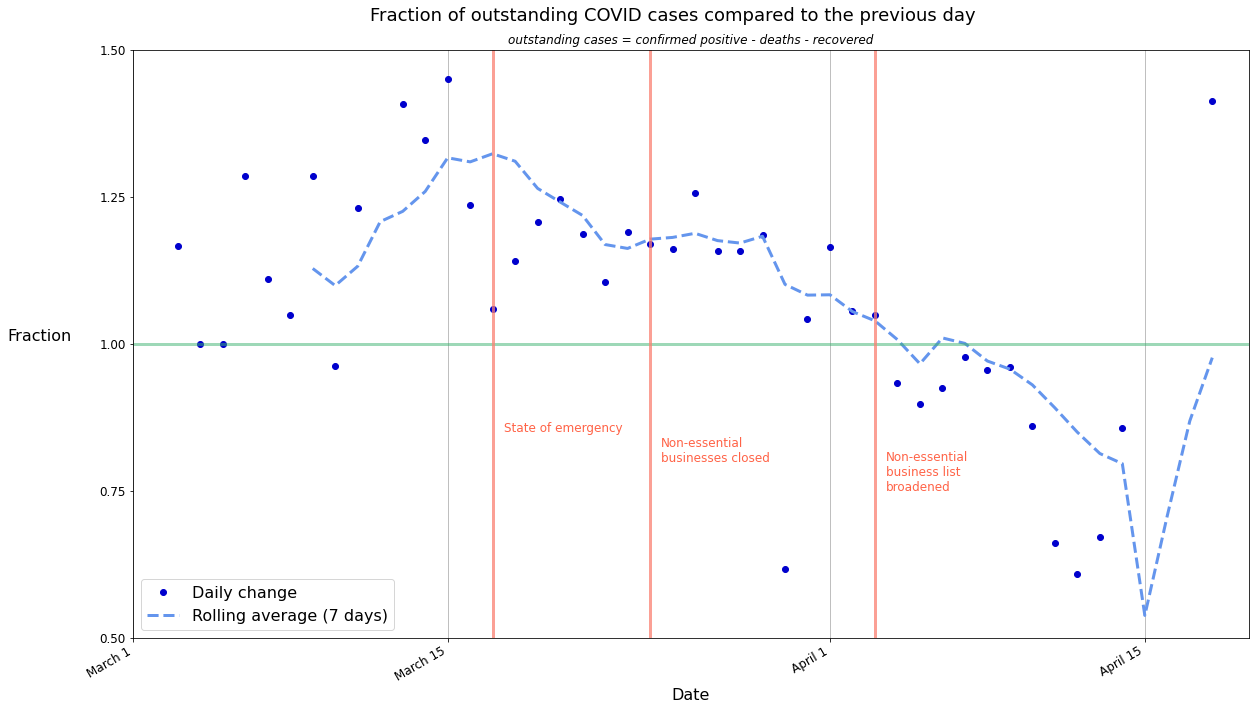

In [112]:
# Outstanding cases are confirmed positives that have not ended in: deaths, resolved
time_series = tests["Confirmed Positive"] - tests["Deaths"] - tests["Resolved"]
start_date = "2020-03-01"
plot_labels = {
    "title": "Fraction of outstanding COVID cases compared to the previous day",
    "subtitle": "outstanding cases = confirmed positive - deaths - recovered"
}

plot_fractional_change(time_series, start_date, plot_labels=plot_labels, government_interventions=GOVERNMENT_INTERVENTIONS)

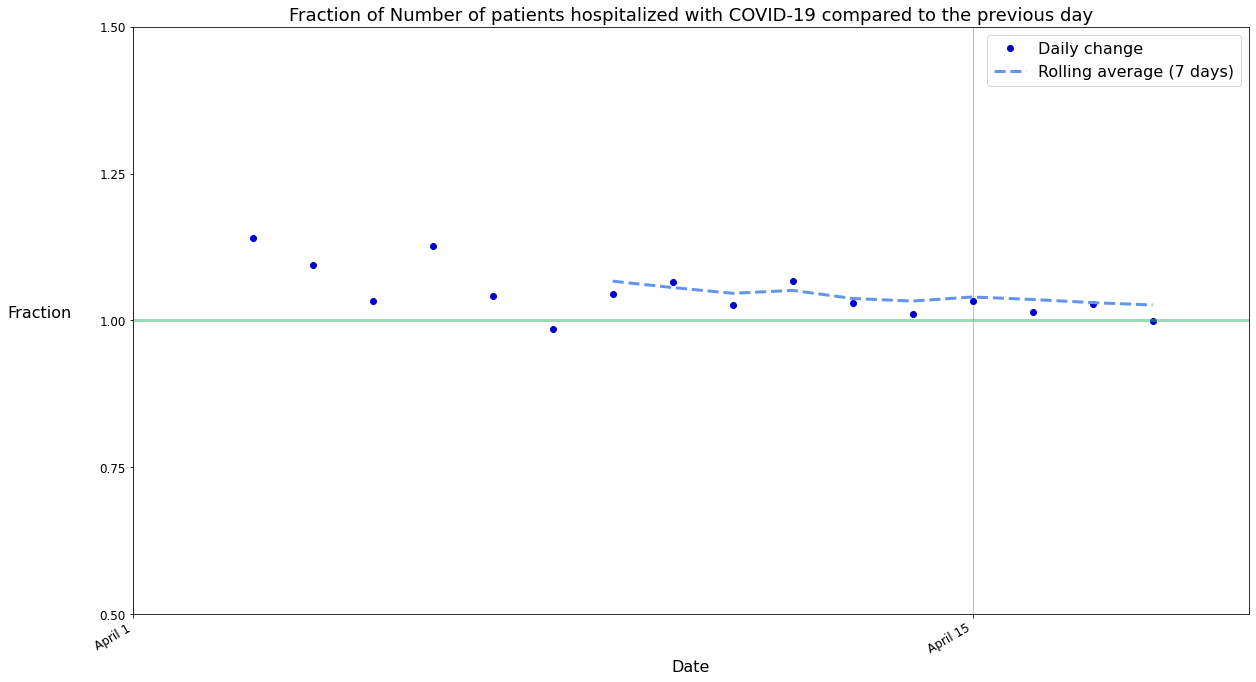

In [60]:
# Outstanding cases are confirmed positives that have not ended in: deaths, resolved
time_series = tests["Number of patients hospitalized with COVID-19"]
start_date = "2020-04-01"
plot_fractional_change(time_series, start_date)

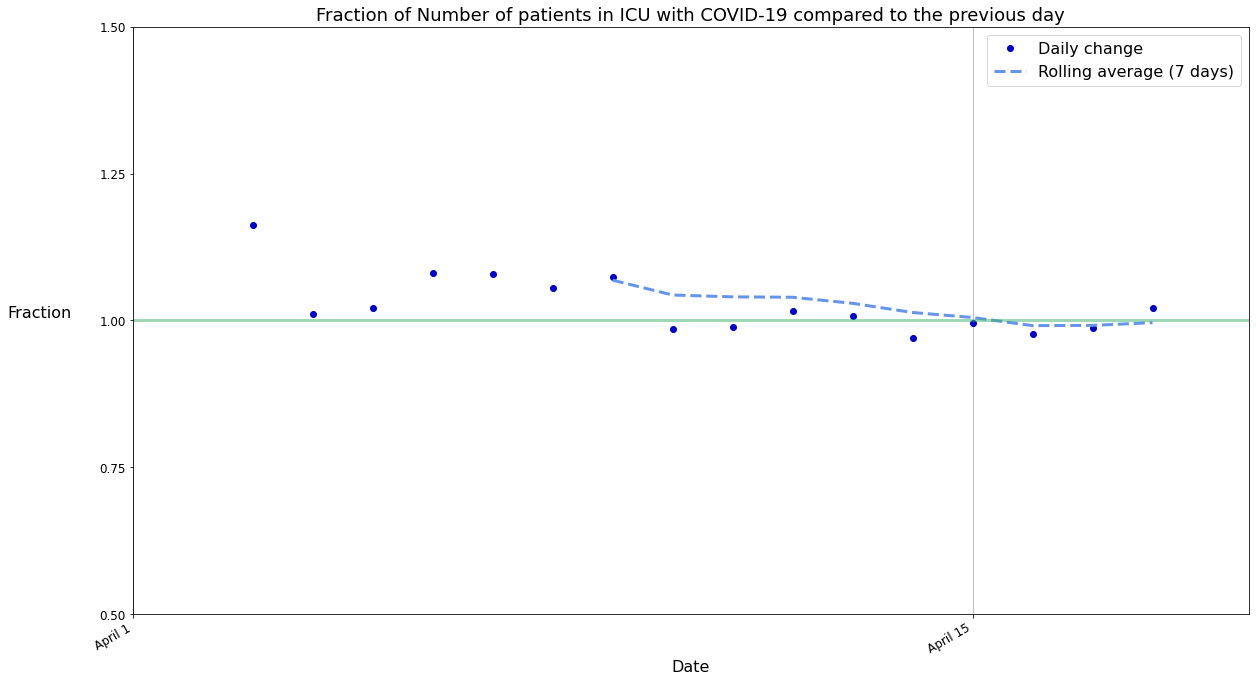

In [61]:
time_series = tests["Number of patients in ICU with COVID-19"]
start_date = "2020-04-01"
plot_fractional_change(time_series, start_date)

# Plot case count timeseries

In [113]:
def plot_timeline(time_series, start_date):
    """
    Make a pretty plot of a timeseries.
    
    Parameters
    ==========
    time_series: DataFrame
        Table with a datetimeindex
        
    start_date: str, in ISO8601
        The date to start the timeline. 
        
    Return 
    ======
    fig: matplotlib.figure.Figure
        Contains two Axes: total per day, change per day.
    """
    fig, [ax_total, ax_change] = plt.subplots(nrows=2, ncols=1)
    axes = {"total": ax_total, "change": ax_change}
    text = {
        "total": {
            "title": "Running total per day", 
            "ylabel": "# Cases", "xlabel": "Date"
        },
        "change": {
            "title": "Change per day", 
            "ylabel": "# Cases", "xlabel": "Date"
        }
    }
        
    time_series.index = pd.to_datetime(time_series.index)
    ts = {"total": time_series, "change": time_series - time_series.shift(1)}
    
    for name, ax in axes.items():          
        # Restrict range in x-axis
        x_data_max = pd.to_datetime(start_date)
        if name == "change":
            x_data_max = x_data_max + pd.DateOffset(1)

        df = ts[name]
        df_plot = df[df.index >= x_data_max]
        
        colors = cm.Dark2(np.linspace(0, 1, len(df_plot.columns)))
        for col, c in zip(df_plot, colors):
            ax.plot(
                df_plot[col], 
                linewidth=3,
                marker="o",
                markersize="9",
                label=col,
                color=c
            )
            if name == "change":
                ax.plot(
                    df_plot[col].rolling(7).mean(), 
                    linewidth="2",
                    linestyle="--",
                    markersize="0",
                    alpha=1,
                    label=f"{col} average",
                    color=c
                )
        if name == "change":
            ax.axhline(
                0, 
                linewidth="2",
                color="grey"
            )
        
        ax.set_xlim([pd.to_datetime(start_date), ts[name].index.max() + pd.DateOffset(1)])
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%B %-d"))
        ax.xaxis.grid(True, which="major")

        ax.set_title(text[name]["title"])
        ax.legend()

    fig.autofmt_xdate()
    return fig

## Morbid measures

In [114]:
morbid_cols = {
    "Number of patients hospitalized with COVID-19": "hospital",
    "Number of patients in ICU with COVID-19": "icu",
    "Number of patients in ICU on a ventilator with COVID-19": "ventilator",
    "Deaths": "deaths"
}
morbid = tests[morbid_cols].rename(columns=morbid_cols)

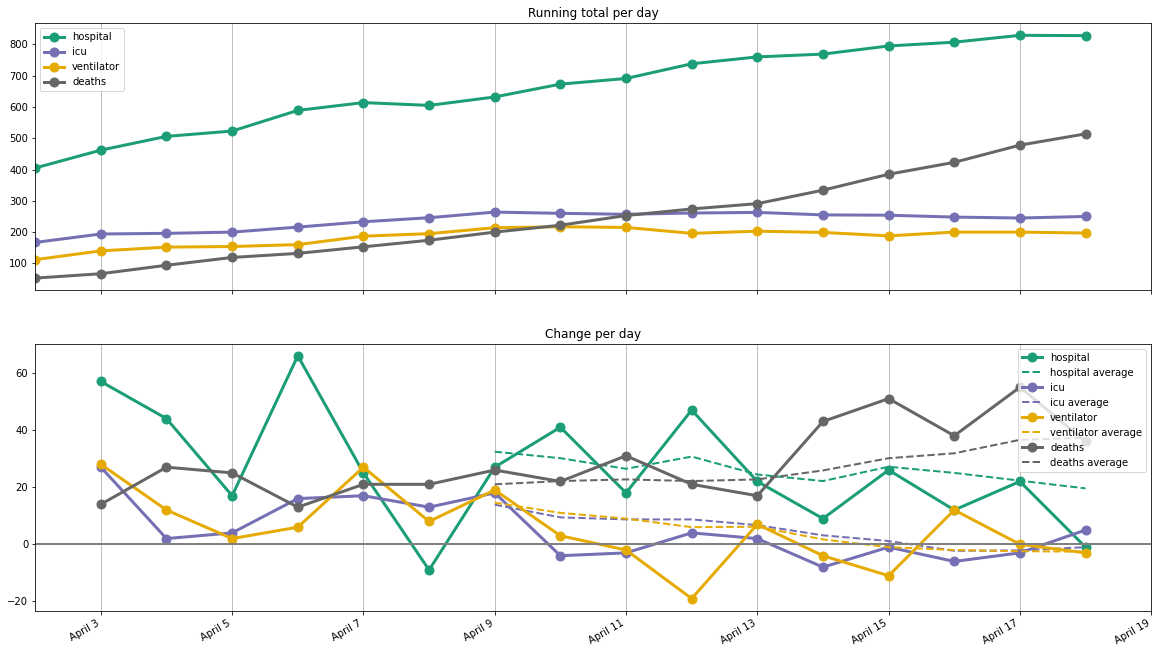

In [115]:
fig = plot_timeline(morbid, "2020-04-02")
plt.show()

## Total cases

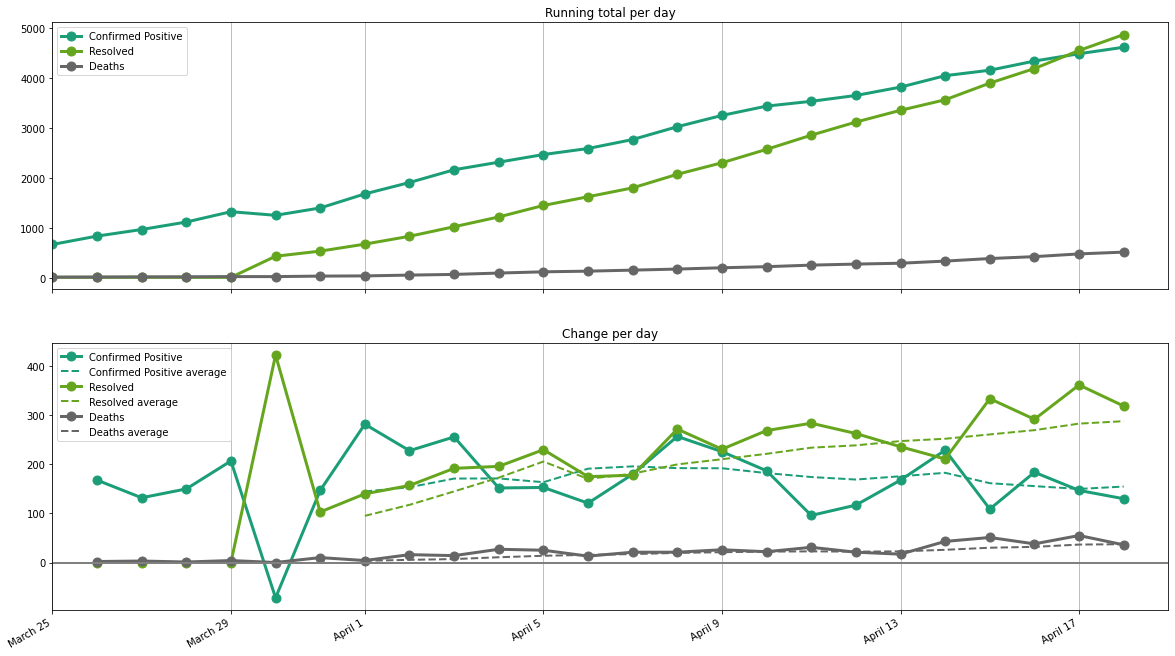

In [116]:
case_cols = ["Confirmed Positive", "Resolved", "Deaths"]
cases = tests[case_cols]
fig = plot_timeline(cases, "2020-03-25")
plt.show()

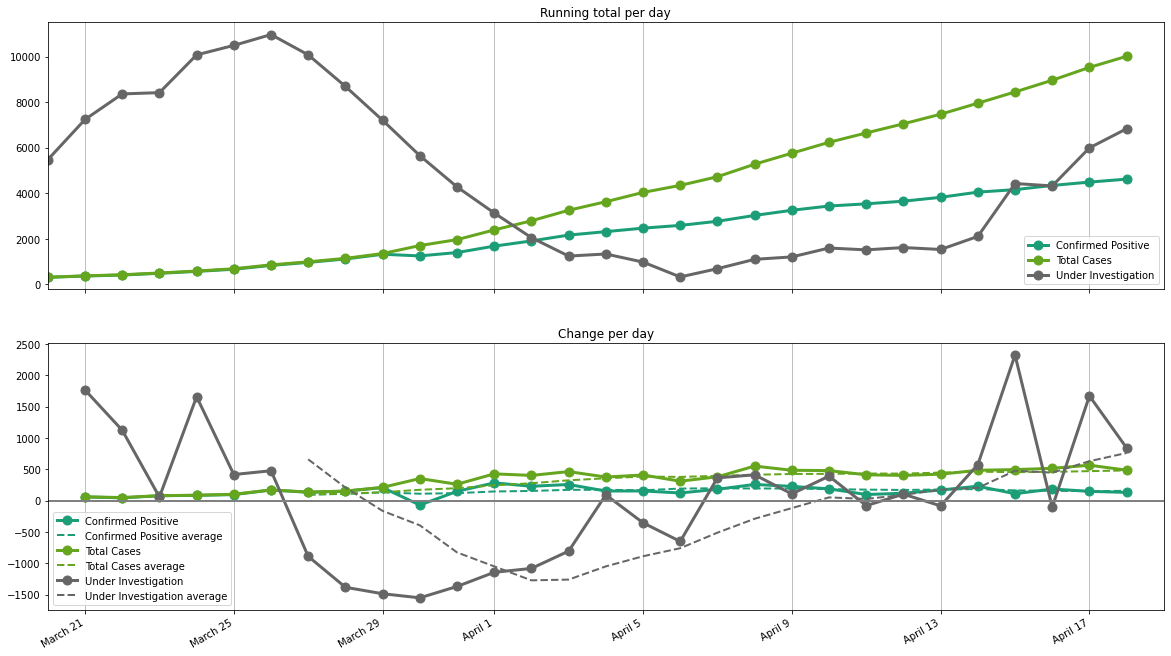

In [117]:
case_cols = ["Confirmed Positive", "Total Cases", "Under Investigation"]
cases = tests[case_cols]
fig = plot_timeline(cases, "2020-03-20")
plt.show()

# Investigate Detailed dataset: Confirmed positive COVID-19 cases in Ontario

In [66]:
dataset = "Confirmed positive cases of COVID-19 in Ontario"
url_website = get_website_url(dataset)
url_dataset = get_data_urls(url_website)
paths_dataset = fetch_test_data(url_dataset)

File already exists: data/2020-04-19/conposcovidloc.csv. Skipping download.
File already exists: data/2020-04-19/conposcovidloc.geojson. Skipping download.


Load the first file: tabular data from a CSV

In [71]:
pos_csv = load_test_data(paths_dataset[0])

In [73]:
pos_csv.tail()

,ROW_ID,ACCURATE_EPISODE_DATE,Age_Group,CLIENT_GENDER,CASE_ACQUISITIONINFO,OUTCOME1,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
10005,10006,2020-04-14,80s,MALE,Information pending,Not Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
10006,10007,2020-04-12,70s,MALE,Information pending,Not Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
10007,10008,2020-04-17,40s,MALE,Information pending,Not Resolved,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
10008,10009,2020-04-14,50s,FEMALE,Information pending,Not Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
10009,10010,2020-04-17,30s,MALE,Information pending,Not Resolved,Middlesex-London Health Unit,50 King Street,London,N6A 5L7,www.healthunit.com,42.981468,-81.254016


In [80]:
pos_csv.columns

Index(['ROW_ID', 'ACCURATE_EPISODE_DATE', 'Age_Group', 'CLIENT_GENDER',
       'CASE_ACQUISITIONINFO', 'OUTCOME1', 'Reporting_PHU',
       'Reporting_PHU_Address', 'Reporting_PHU_City',
       'Reporting_PHU_Postal_Code', 'Reporting_PHU_Website',
       'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'],
      dtype='object')

Load the second file: geographic data from the geoJSON

In [77]:
filename_geojson = paths_dataset[1]
with open(filename_geojson, "rb") as f:
    pos_geo = gpd.read_file(f)

In [79]:
pos_geo.tail()

,CASE_ACQUISITIONINFO,Reporting_PHU_Postal_Code,CLIENT_GENDER,OBJECTID,ACCURATE_EPISODE_DATE,OUTCOME1,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Website,ROW_ID,_id,Age_Group,Reporting_PHU_Address,Reporting_PHU_Longitude,Reporting_PHU,geometry
10005,Information pending,M5B 1W2,MALE,10006,2020-04-14T00:00:00,Not Resolved,Toronto,43.656591,www.toronto.ca/community-people/health-wellnes...,10006,10006,80s,"277 Victoria Street, 5th Floor",-79.379358,Toronto Public Health,POINT (-79.37936 43.65659)
10006,Information pending,M5B 1W2,MALE,10007,2020-04-12T00:00:00,Not Resolved,Toronto,43.656591,www.toronto.ca/community-people/health-wellnes...,10007,10007,70s,"277 Victoria Street, 5th Floor",-79.379358,Toronto Public Health,POINT (-79.37936 43.65659)
10007,Information pending,L5W 1N4,MALE,10008,2020-04-17T00:00:00,Not Resolved,Mississauga,43.647471,www.peelregion.ca/health/,10008,10008,40s,7120 Hurontario Street,-79.708893,Peel Public Health,POINT (-79.70889 43.64747)
10008,Information pending,M5B 1W2,FEMALE,10009,2020-04-14T00:00:00,Not Resolved,Toronto,43.656591,www.toronto.ca/community-people/health-wellnes...,10009,10009,50s,"277 Victoria Street, 5th Floor",-79.379358,Toronto Public Health,POINT (-79.37936 43.65659)
10009,Information pending,N6A 5L7,MALE,10010,2020-04-17T00:00:00,Not Resolved,London,42.981468,www.healthunit.com,10010,10010,30s,50 King Street,-81.254016,Middlesex-London Health Unit,POINT (-81.25402 42.98147)


Explore the geoJSON dataset

In [84]:
set(pos_geo.columns) - set(pos_csv.columns)

{'OBJECTID', '_id', 'geometry'}

In [87]:
(pos_geo["ROW_ID"] - pos_geo["OBJECTID"]).sum()

0

In [88]:
(pos_geo["ROW_ID"] - pos_geo["_id"]).sum()

0

In [93]:
pos_geo["geometry"]

0        POINT (-79.70889 43.64747)
1        POINT (-75.76391 45.34567)
2        POINT (-79.37936 43.65659)
3        POINT (-79.37936 43.65659)
4        POINT (-79.70889 43.64747)
                    ...            
10005    POINT (-79.37936 43.65659)
10006    POINT (-79.37936 43.65659)
10007    POINT (-79.70889 43.64747)
10008    POINT (-79.37936 43.65659)
10009    POINT (-81.25402 42.98147)
Name: geometry, Length: 10010, dtype: geometry

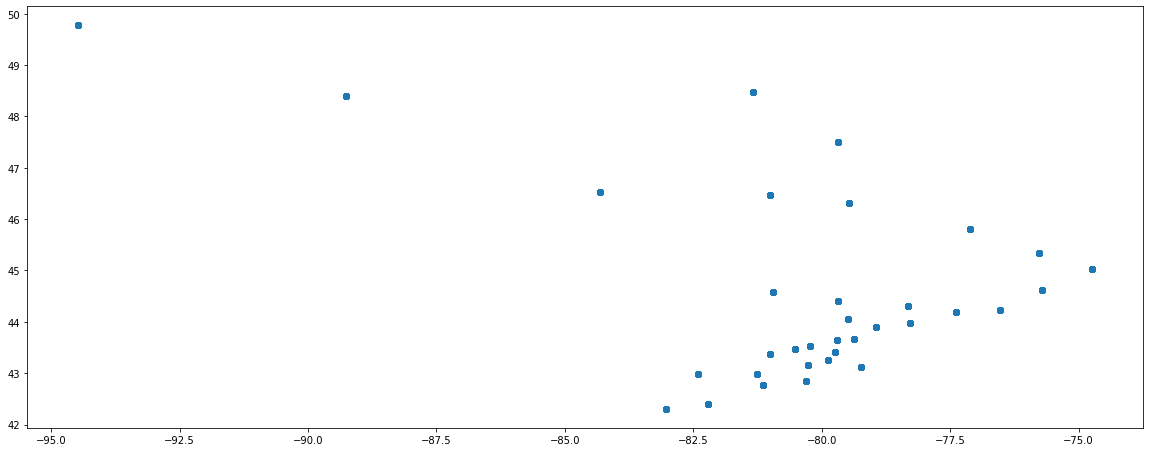

In [94]:
pos_geo["geometry"].plot()

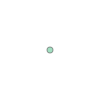

In [95]:
pos_geo["geometry"][0].

Next step! Try out contextily to make nice plots